# Exercise

In [18]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_valid, y_valid = x_train[:5000], y_train[:5000]
x_train, y_train = x_train[5000:], y_train[5000:]

# a)

In [24]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[32, 32, 3]))
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

# b)

In [25]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [31]:
learning_rates = [0.001, 0.0001, 0.00001]

val_accuracies = []

for lr in learning_rates:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=[32, 32, 3]))
    model.add(tf.keras.layers.Flatten())

    for _ in range(20):
        model.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))

    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    optimizer = tf.keras.optimizers.Nadam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

    val_acc = max(history.history['val_accuracy'])
    val_accuracies.append(val_acc)

best_lr_index = val_accuracies.index(max(val_accuracies))
best_lr = learning_rates[best_lr_index]
print("Best learning rate:", best_lr)

Epoch 1/10
1407/1407 [==============================] - 12s 7ms/step - loss: 3.3178 - accuracy: 0.2086 - val_loss: 2.1295 - val_accuracy: 0.2138
Epoch 2/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9989 - accuracy: 0.2518 - val_loss: 1.9579 - val_accuracy: 0.2752
Epoch 3/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.9228 - accuracy: 0.2855 - val_loss: 1.8996 - val_accuracy: 0.3014
Epoch 4/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8802 - accuracy: 0.3084 - val_loss: 1.8857 - val_accuracy: 0.3038
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8507 - accuracy: 0.3194 - val_loss: 1.8536 - val_accuracy: 0.3312
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8267 - accuracy: 0.3363 - val_loss: 1.8621 - val_accuracy: 0.3218
Epoch 7/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9127 - accuracy: 0.2923 - val_loss: 1.8908 - val_acc

In [32]:
from pathlib import Path

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_model", save_best_only=True)

run_index = 1
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, checkpoint_cb, tensorboard_cb]

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs

In [34]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [35]:
model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 16s 9ms/step - loss: 2.0405 - accuracy: 0.2621 - val_loss: 1.9699 - val_accuracy: 0.2692
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8670 - accuracy: 0.3216 - val_loss: 1.9968 - val_accuracy: 0.2940
Epoch 3/100
1407/1407 [==============================] - 13s 10ms/step - loss: 1.7891 - accuracy: 0.3534 - val_loss: 1.9321 - val_accuracy: 0.3350
Epoch 4/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7261 - accuracy: 0.3751 - val_loss: 1.7259 - val_accuracy: 0.3618
Epoch 5/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.6862 - accuracy: 0.3915 - val_loss: 1.6962 - val_accuracy: 0.3848
Epoch 6/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.6474 - accuracy: 0.4062 - val_loss: 1.6447 - val_accuracy: 0.4008
Epoch 7/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6179 - accuracy: 0.4176 - val_loss: 1.6

In [37]:
model.evaluate(x_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.4779 - accuracy: 0.4788


[1.4778989553451538, 0.4787999987602234]

# c

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[32, 32, 3]))
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_model", save_best_only=True)

run_index = 2
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, checkpoint_cb, tensorboard_cb]

In [41]:
model.fit(x_train, y_train, epochs=100,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 31s 17ms/step - loss: 2.6067 - accuracy: 0.1109 - val_loss: 4.3798 - val_accuracy: 0.1084
Epoch 2/100
1407/1407 [==============================] - 24s 17ms/step - loss: 2.3610 - accuracy: 0.1393 - val_loss: 2.6820 - val_accuracy: 0.1300
Epoch 3/100
1407/1407 [==============================] - 22s 16ms/step - loss: 2.1857 - accuracy: 0.1892 - val_loss: 2.1955 - val_accuracy: 0.2058
Epoch 4/100
1407/1407 [==============================] - 32s 23ms/step - loss: 2.0559 - accuracy: 0.2382 - val_loss: 2.0273 - val_accuracy: 0.2518
Epoch 5/100
1407/1407 [==============================] - 35s 25ms/step - loss: 1.9649 - accuracy: 0.2781 - val_loss: 1.9265 - val_accuracy: 0.3068
Epoch 6/100
1407/1407 [==============================] - 34s 24ms/step - loss: 1.8983 - accuracy: 0.3067 - val_loss: 1.8638 - val_accuracy: 0.3258
Epoch 7/100
1407/1407 [==============================] - 35s 25ms/step - loss: 1.8387 - accuracy: 0.3332 - val_loss: 1

In [42]:
model.evaluate(x_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.4067 - accuracy: 0.5020


[1.4067293405532837, 0.5019999742507935]

# d

In [43]:
tf.keras.backend.clear_session()


model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[32, 32, 3]))
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))


optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_model_selu", save_best_only=True)

run_index = 3
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, checkpoint_cb, tensorboard_cb]

In [46]:
x_means = x_train.mean(axis=0)
x_stds = x_train.std(axis=0)
x_train_scaled = (x_train - x_means) / x_stds
x_valid_scaled = (x_valid - x_means) / x_stds
x_test_scaled = (x_test - x_means) / x_stds

In [48]:
model.fit(x_train_scaled, y_train, epochs=100,
          validation_data=(x_valid_scaled, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 15s 9ms/step - loss: 1.8382 - accuracy: 0.3431 - val_loss: 1.6999 - val_accuracy: 0.3928
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.6215 - accuracy: 0.4223 - val_loss: 1.5990 - val_accuracy: 0.4264
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5246 - accuracy: 0.4562 - val_loss: 1.5358 - val_accuracy: 0.4596
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.4529 - accuracy: 0.4809 - val_loss: 1.5141 - val_accuracy: 0.4564
Epoch 5/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3909 - accuracy: 0.5042 - val_loss: 1.4937 - val_accuracy: 0.4766
Epoch 6/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.3381 - accuracy: 0.5261 - val_loss: 1.4757 - val_accuracy: 0.4776
Epoch 7/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.2866 - accuracy: 0.5448 - val_loss: 1.4626 -

In [50]:
model.evaluate(x_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.4419 - accuracy: 0.4956


[1.4418914318084717, 0.49559998512268066]

# e)

In [51]:
tf.keras.backend.clear_session()


model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[32, 32, 3]))
model.add(tf.keras.layers.Flatten())

for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_model_alpha_dropout", save_best_only=True)

run_index = 4
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, checkpoint_cb, tensorboard_cb]

In [52]:
x_means = x_train.mean(axis=0)
x_stds = x_train.std(axis=0)
x_train_scaled = (x_train - x_means) / x_stds
x_valid_scaled = (x_valid - x_means) / x_stds
x_test_scaled = (x_test - x_means) / x_stds

In [53]:
model.fit(x_train_scaled, y_train, epochs=100,
          validation_data=(x_valid_scaled, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 15s 9ms/step - loss: 1.9568 - accuracy: 0.3184 - val_loss: 1.6793 - val_accuracy: 0.4000
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.6553 - accuracy: 0.4134 - val_loss: 1.5917 - val_accuracy: 0.4382
Epoch 3/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5364 - accuracy: 0.4523 - val_loss: 1.5634 - val_accuracy: 0.4504
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4615 - accuracy: 0.4798 - val_loss: 1.5448 - val_accuracy: 0.4596
Epoch 5/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3988 - accuracy: 0.5021 - val_loss: 1.5016 - val_accuracy: 0.4726
Epoch 6/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.3418 - accuracy: 0.5258 - val_loss: 1.4933 - val_accuracy: 0.4890
Epoch 7/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.2929 - accuracy: 0.5419 - val_loss: 1.4

In [54]:
model.evaluate(x_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.4693 - accuracy: 0.4918


[1.4692630767822266, 0.4918000102043152]

In [55]:
class MCAlphaDropout(tf.keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [57]:
mc_model = tf.keras.Sequential([(MCAlphaDropout(layer.rate)
                                    if isinstance(layer, tf.keras.layers.AlphaDropout)
                                    else layer)
                                for layer in model.layers])

In [58]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return Y_probas.argmax(axis=1)

In [61]:
import numpy as np

tf.random.set_seed(42)

y_pred = mc_dropout_predict_classes(mc_model, x_valid_scaled)
accuracy = (y_pred == y_valid[:, 0]).mean()
accuracy

157/157 [==============================] - 0s 2ms/step


0.4888

# f)

In [63]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

352/352 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.1748


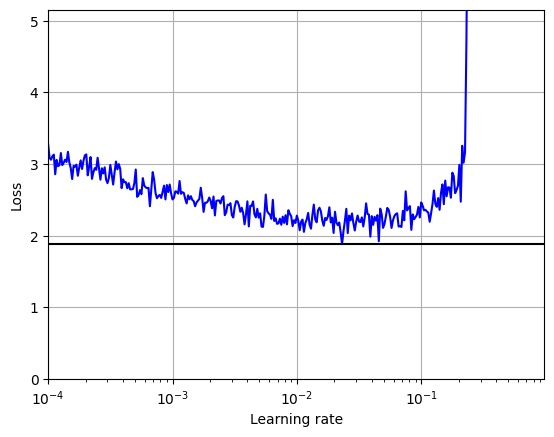

In [70]:
import math
import matplotlib.pyplot as plt

K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]  # the epoch's mean loss so far 
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate,
                    self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

batch_size = 128
rates, losses = find_learning_rate(model, x_train_scaled, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [71]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [75]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

n_epochs = 15
n_iterations = math.ceil(len(x_train_scaled) / batch_size) * n_epochs

onecycle = OneCycleScheduler(n_iterations, max_lr=0.05)
history = model.fit(x_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 4s 9ms/step - loss: 2.0370 - accuracy: 0.2937 - val_loss: 1.7812 - val_accuracy: 0.3760
Epoch 2/15
352/352 [==============================] - 3s 8ms/step - loss: 1.7652 - accuracy: 0.3786 - val_loss: 1.6501 - val_accuracy: 0.4180
Epoch 3/15
352/352 [==============================] - 3s 8ms/step - loss: 1.6270 - accuracy: 0.4233 - val_loss: 1.6123 - val_accuracy: 0.4364
Epoch 4/15
352/352 [==============================] - 3s 8ms/step - loss: 1.5457 - accuracy: 0.4523 - val_loss: 1.6509 - val_accuracy: 0.4260
Epoch 5/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4923 - accuracy: 0.4688 - val_loss: 1.6174 - val_accuracy: 0.4414
Epoch 6/15
352/352 [==============================] - 3s 9ms/step - loss: 1.4472 - accuracy: 0.4868 - val_loss: 1.6088 - val_accuracy: 0.4444
Epoch 7/15
352/352 [==============================] - 4s 12ms/step - loss: 1.4134 - accuracy: 0.4981 - val_loss: 1.6141 - val_accuracy: 0.4458
Epoch

In [77]:
history